📊 1. กราฟแสดงการกระจายตัวของข้อมูล (Histograms):


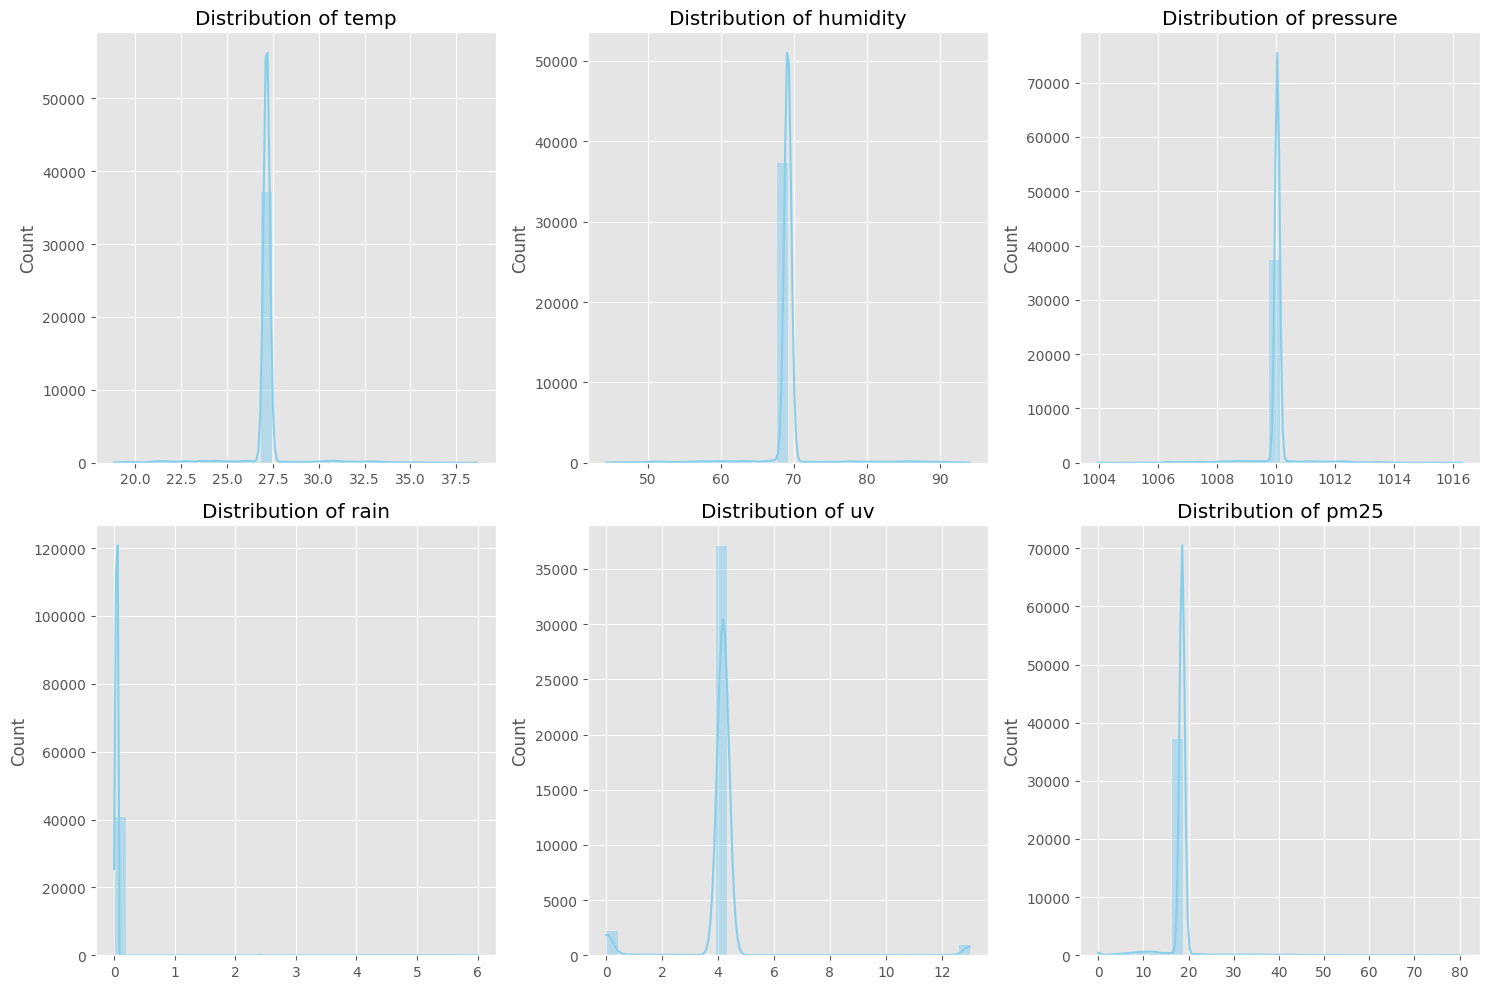


📈 2. กราฟแสดงแนวโน้มตามเวลา (Time Series Trend):


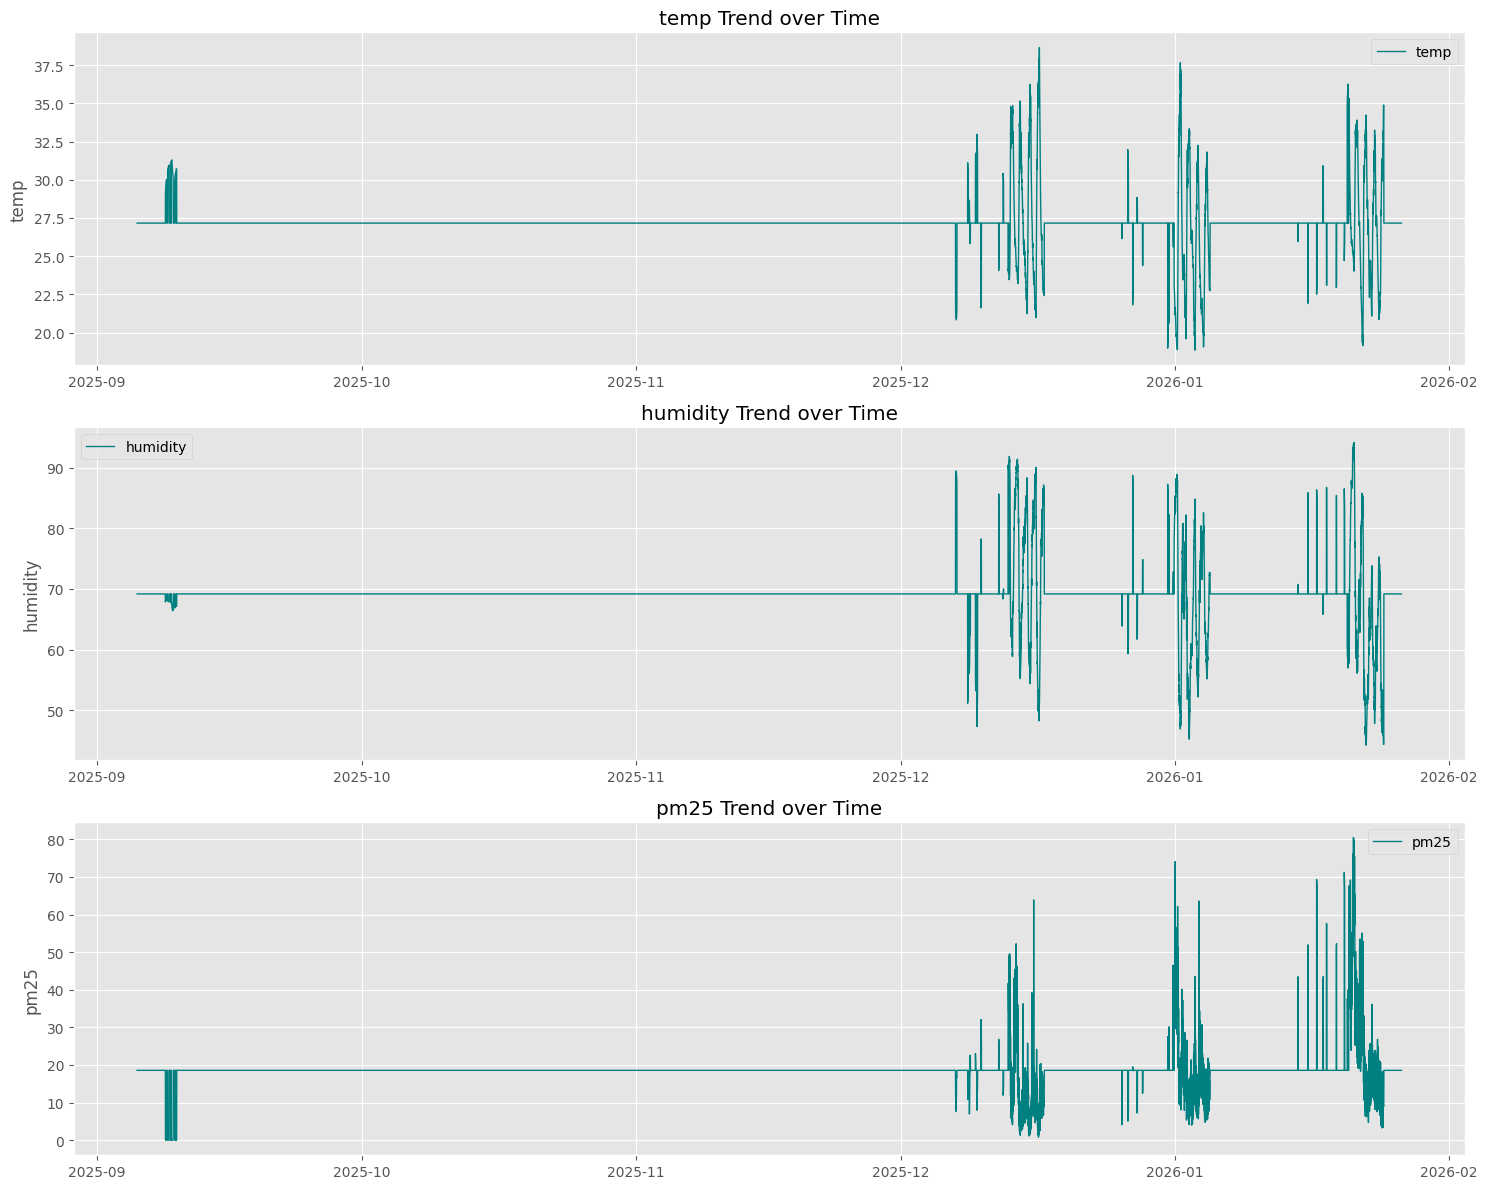


🔥 3. แผนภาพความสัมพันธ์ (Correlation Heatmap):


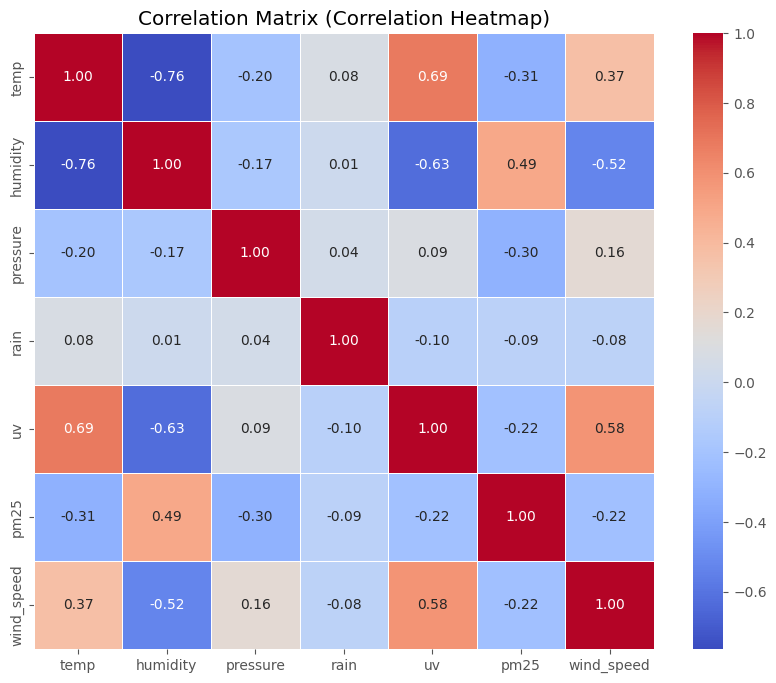

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. โหลดข้อมูล (ใช้ไฟล์ Cleaned ล่าสุด)
df = pd.read_csv('zeus_dataset_cleaned.csv')

# แปลงเวลาให้เป็น datetime ก่อนเสมอ
df['datetime'] = pd.to_datetime(df['datetime'])

# ตั้งค่า Font กราฟ (ถ้ามีภาษาไทยอาจต้องลง font เพิ่ม, แนะนำใช้ภาษาอังกฤษไปก่อน)
plt.style.use('ggplot') # เลือกธีมกราฟสวยๆ

# ==========================================
# ส่วนที่ 1: ดูการกระจายตัว (Distribution) - Histograms
# ==========================================
def plot_distribution(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns):
        plt.subplot(2, 3, i+1) # สร้างช่องกราฟย่อย 2 แถว 3 คอลัมน์
        sns.histplot(df[col], kde=True, bins=30, color='skyblue') # กราฟแท่ง + เส้นโค้ง
        plt.title(f'Distribution of {col}')
        plt.xlabel('')
    plt.tight_layout()
    plt.show()

# เลือกตัวแปรที่อยากดูการกระจาย
cols_to_plot = ['temp', 'humidity', 'pressure', 'rain', 'uv', 'pm25']
print("📊 1. กราฟแสดงการกระจายตัวของข้อมูล (Histograms):")
plot_distribution(df, cols_to_plot)

# ==========================================
# ส่วนที่ 2: ดูแนวโน้มตามเวลา (Time Series) - Line Charts
# ==========================================
def plot_timeseries(df, columns):
    plt.figure(figsize=(15, 12))
    for i, col in enumerate(columns):
        plt.subplot(len(columns), 1, i+1) # กราฟเรียงลงมาแนวตั้ง
        plt.plot(df['datetime'], df[col], label=col, color='teal', linewidth=1)
        plt.title(f'{col} Trend over Time')
        plt.ylabel(col)
        plt.legend()
    plt.tight_layout()
    plt.show()

# เลือกตัวแปรที่อยากดูเทรนด์ (เช่น อุณหภูมิ, ความชื้น, ฝุ่น)
ts_cols = ['temp', 'humidity', 'pm25'] 
print("\n📈 2. กราฟแสดงแนวโน้มตามเวลา (Time Series Trend):")
plot_timeseries(df, ts_cols)

# ==========================================
# ส่วนที่ 3: ดูความสัมพันธ์ (Correlation) - Heatmap
# ==========================================
print("\n🔥 3. แผนภาพความสัมพันธ์ (Correlation Heatmap):")
plt.figure(figsize=(10, 8))
# เลือกเฉพาะคอลัมน์ตัวเลขที่น่าสนใจ
corr_cols = ['temp', 'humidity', 'pressure', 'rain', 'uv', 'pm25', 'wind_speed']
corr_matrix = df[corr_cols].corr()

# วาด Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix (Correlation Heatmap)')
plt.show()

วิธีดูผลลัพธ์ (Interpretations)
Histogram (กราฟแท่ง):
Temp: ควรจะเป็นระฆังคว่ำ (Normal Distribution) เบ้ซ้าย/ขวานิดหน่อย
Rain: กราฟจะ เบ้ขวาสุดๆ (Right Skewed) คือแท่งสูงปรี๊ดที่เลข 0 (ฝนไม่ตก) และมีขีดเล็กๆ ตรงค่าฝนตก (นี่คือปกติของข้อมูลฝนครับ)

Time Series (กราฟเส้น):
ดูว่ามี Pattern ซ้ำๆ ไหม? (เช่น อุณหภูมิขึ้นตอนกลางวัน ลงตอนกลางคืน เป็นคลื่นลูกคลื่น)
ถ้ากราฟขาดช่วง แสดงว่าข้อมูลหาย (แต่เรา Clean แล้ว ไม่น่าเจอ)

Heatmap (ตารางสี):
สีแดงเข้ม (+1): สัมพันธ์กันตามกัน (เช่น แดดแรง -> ร้อน)
สีน้ำเงินเข้ม (-1): สัมพันธ์กันสวนทาง (เช่น ร้อน -> ความชื้นต่ำ)
สีจางๆ (0): ไม่เกี่ยวข้องกันเลย